In [2]:
%pip install matplotlib numpy pandas shapely descartes

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import pandas as pd
from shapely.geometry import Point
from descartes import PolygonPatch

In [24]:
df = pd.read_csv("ab.csv")
df

,i,x,y,Ox,Oy,R0,minR,maxR
0,0,381.749142,37.863150,0.08772,-8.771695,438.614,384.500,488.423
1,0,383.472595,-38.034088,0.08772,-8.771695,438.614,384.500,488.423
2,0,486.909117,-48.293266,0.08772,-8.771695,438.614,384.500,488.423
3,0,485.185747,48.122337,0.08772,-8.771695,438.614,384.500,488.423
4,1,381.749142,37.863150,0.08772,-8.771695,393.990,384.500,403.481
5,1,383.472595,-38.034088,0.08772,-8.771695,393.990,384.500,403.481
6,1,402.365548,-39.907954,0.08772,-8.771695,393.990,384.500,403.481
7,1,400.642113,39.737018,0.08772,-8.771695,393.990,384.500,403.481
8,2,400.642113,39.737018,0.08772,-8.771695,415.471,403.481,427.462
9,2,402.365548,-39.907954,0.08772,-8.771695,415.471,403.481,427.462


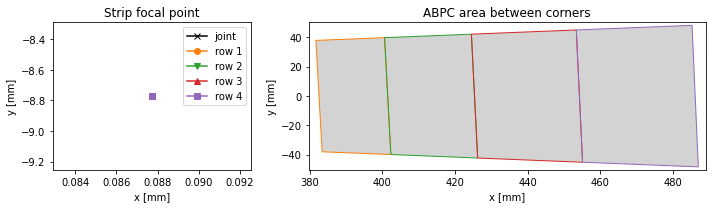

In [26]:
fig, (Oax, ax) = plt.subplots(1, 2, figsize=(10,3), gridspec_kw={"width_ratios": [1, 2]})

marker = ["x", "o", "v", "^", "s"]

cmap = plt.get_cmap("tab10")

xmax = 0
xmin = 1e10

ymin = 1
ymax = -1
for i in range(df.i.max()+1):
    idf = df[df.i == i]
#     ax.scatter(np.concatenate([idf.x, idf.x[:1]]), np.concatenate([idf.y, idf.y[:1]]), marker=marker[i])


    ec = cmap(i)
    kw = {"fc": "none", "ec": ec}
    if i==0:
        kw = {"fc": "lightgrey"}
        ec = "black"
        
    l = f"row {i}"
    if i == 0: l = "joint"
    Ox, Oy = idf.iloc[0]["Ox"], idf.iloc[0]["Oy"]
    
#     idf.x += Ox
#     idf.y += Oy
#     Ox, Oy = 0, 0
    
#     print(Ox, Oy)
    Oax.plot(Ox, Oy, marker=marker[i%len(marker)], c=ec, label=l)
    
        
    poly = Polygon(np.stack([idf.x, idf.y], axis=1), closed=True, **kw)
    ax.add_patch(poly)
#     print(np.stack([idf.x, idf.y], axis=1).shape)

#     print(i)
#     print(idf.x)
    x0_L = idf.x.iloc[0]
    y0_L = idf.y.iloc[0]
    x1_L = idf.x.iloc[3]
    y1_L = idf.y.iloc[3]
    
    x0_R = idf.x.iloc[1]
    y0_R = idf.y.iloc[1]
    x1_R = idf.x.iloc[2]
    y1_R = idf.y.iloc[2]
    
    dx_L = x1_L - x0_L
    dy_L = y1_L - y0_L
    n = np.sqrt(dx_L**2 + dy_L**2)
    dx_L /= n
    dy_L /= n
    
    dx_R = x1_R - x0_R
    dy_R = y1_R - y0_R
    n = np.sqrt(dx_R**2 + dy_R**2)
    dx_R /= n
    dy_R /= n
    
#     rad = np.sqrt(x0_R**2 +y0_R**2)
    
#     for k in ("minR", "maxR"):
#         m = Point(Ox, Oy).buffer(idf.iloc[0][k], resolution=100)
#         ax.add_patch(PolygonPatch(m, fc="none", ls="--", ec=ec))

    f = np.linspace(0, 800, 10)
    xs = x1_L - dx_L*f
    ys = y1_L - dy_L*f
#     Oax.plot(xs, ys, c=ec)
#     ax.plot(xs, ys, c=ec)
    
    xs = x1_R - dx_R*f
    ys = y1_R - dy_R*f
#     Oax.plot(xs, ys, c=ec)
#     ax.plot(xs, ys, c=ec)
        
    xmin = min(xmin, idf.x.min())
    xmax = max(xmax, idf.x.max())
    
    ymin = min(ymin, idf.y.min())
    ymax = max(ymax, idf.y.max())
    
    
#     break
    
    
# Oax.set_xlim(0.05, 0.1)
# Oax.set_ylim(-7.5, -9.75)
Oax.legend()
    
ax.set_xlim(xmin-2, xmax+2)
ax.set_ylim(ymin-2, ymax+2)
    
for _ax in ax, Oax:
    _ax.set_xlabel("x [mm]")
    _ax.set_ylabel("y [mm]")
    
Oax.set_title("Strip focal point")
ax.set_title("ABPC area between corners")
        
fig.tight_layout()
fig.savefig("ab.pdf")

In [49]:
import os
os.getcwd()

'/home/pagessin/dev/acts'

In [4]:
os.chdir("/home/pagessin/dev/acts")

In [67]:
R0 = 609.405
maxR = 637.209
minR = 575.594
(maxR + minR) /2.0

606.4014999999999

In [68]:
R=438.614
Ri=384.500
Ro=488.423

R 